<a href="https://colab.research.google.com/github/Casassarnau/ASW-Project-Vue/blob/master/missi%C3%B3_lila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💜 MISSIÓ LILA 💜

## Objectius 

Volem que implementeu un model o algoritme que permeti classificar del dataset A2 si aquella imatge hi ha error o no. Ens agradaria que mostressiu alguna gràfica de l'entrenament del model (en cas de fer ML) o mètriques qualitatives ( accuracy, recall, f1...) i quantitatives (matrius de confusió, ROC curve...).

# Setup

Install libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Mount drive volume into google colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Extreure les dades

Unziped all images and information to our drive

In [ ]:
#!unzip "gdrive/MyDrive/HackEPS2022/data/A1.zip" -d "gdrive/MyDrive/HackEPS2022/data/lila"

Loading all information into a dataframe

In [3]:
train_df = pd.read_csv("gdrive/MyDrive/HackEPS2022/groc.csv")
train_df.shape

(3211, 7)

##Preprocessing

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3211 non-null   int64 
 1   c           3211 non-null   object
 2   r           3211 non-null   object
 3   e           3211 non-null   object
 4   name        3211 non-null   object
 5   path        3211 non-null   object
 6   tipus       3211 non-null   object
dtypes: int64(1), object(6)
memory usage: 175.7+ KB


In [5]:
train_df.head(15)

,Unnamed: 0,c,r,e,name,path,tipus
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Quart teixit
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Quart teixit
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Quart teixit
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Quart teixit
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Quart teixit
5,5,c3,r1,e3,c3r1e3n43,badata/cd1/data/c3/r1/images/e3/c3r1e3n43.tif,Quart teixit
6,6,c3,r1,e3,c3r1e3n5,badata/cd1/data/c3/r1/images/e3/c3r1e3n5.tif,Quart teixit
7,7,c3,r1,e3,c3r1e3n44,badata/cd1/data/c3/r1/images/e3/c3r1e3n44.tif,Quart teixit
8,8,c3,r1,e3,c3r1e3n30,badata/cd1/data/c3/r1/images/e3/c3r1e3n30.tif,Quart teixit
9,9,c3,r1,e3,c3r1e3n41,badata/cd1/data/c3/r1/images/e3/c3r1e3n41.tif,Quart teixit


Translating the string into id types

In [6]:
translator = {"Estampado": 0, "Primer teixit": 1, "Segon teixit": 2, "Tercer teixit": 3, "Quart teixit": 4, "Cinqué teixit": 5}
train_df["tipus"] = train_df.tipus.map(lambda row_tipus: translator.get(row_tipus))

Getting rid of the unnecessary data, we only want path and the type id

In [7]:
train_df = train_df[["path", "tipus"]]


In [8]:
train_df.head()

,path,tipus
0,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,4
1,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,4
2,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,4
3,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,4
4,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,4


We don't want to add unwanted relationsships between types and so we one-hot encoded the type ids

In [9]:
from sklearn.preprocessing import OneHotEncoder

encod = OneHotEncoder()

encod.fit(train_df[['tipus']])
patterns = encod.transform(train_df[['tipus']]).toarray()

In [10]:
train_df[['0', '1', '2', '3', '4', '5']] = patterns

In [11]:
train_df.head()

,path,tipus,0,1,2,3,4,5
0,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
1,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
2,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
3,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
4,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,4,0.0,0.0,0.0,0.0,1.0,0.0


Getting the index patterns names

In [12]:
index_patterns = train_df.columns[2:]

## Model preprocessing

In [13]:
import cv2, os
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

Creating a generator in order to consume less RAM.

 

*   Before iterating we shuffle the dataframe so that the model don't get used to a single type.
*   Replacing the path in order to get the image from our drive
*   Reshaping the images to fit to the model training shape needs




In [14]:
IMG_SIZE = 224
images = []
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

def get_images():
  shffled_train_df = train_df.sample(frac=1)
  for index, row in shffled_train_df.iterrows():
    path = row.path
    path = path.replace("badata/cd1/data/", "gdrive/MyDrive/HackEPS2022/data/lila/A1/")
    try:
        img_arr = cv2.imread(path)
        resized_arr = resize_and_rescale(img_arr) # Reshaping images to preferred size
        yield tf.reshape(resized_arr, (1, 224,224,3)), tf.reshape(tf.convert_to_tensor(row[index_patterns], dtype=tf.float32), (1, 6))
    except Exception as e:
        pass

Finally not used, but we created another generator that augment images doing transformations to them. We didn't implement this because then the randomness of each type is lost.

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

def augment_images():
  for image, image_tag in get_images():
    yield image, image_tag
    for _ in range(5):
      augmented_image = data_augmentation(image)
      yield augmented_image, image_tag

Creating the dataset from the generator

In [16]:
dataset = tf.data.Dataset.from_generator(
     get_images,
     output_signature=(
         tf.TensorSpec(shape=(1, 224,224,3), dtype=tf.float32),
         tf.TensorSpec(shape=(1, 6), dtype=tf.float32)))

Splitting the dataset into test_dataset and train_dataset, this is done by enumerating all the instances and then getting the ones that their index is divisor by 4.

In [17]:
# Splitting the dataset for training and testing.
def is_test(x, _):
    return x % 4 == 0


def is_train(x, y):
    return not is_test(x, y)


recover = lambda x, y: y

# Split the dataset for training.
test_dataset = dataset.enumerate() \
    .filter(is_test) \
    .map(recover)

# Split the dataset for testing/validation.
train_dataset = dataset.enumerate() \
    .filter(is_train) \
    .map(recover)

## Modeling

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

In [19]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3), padding="same"),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 5 output neuron. It will contain a value from 0-1 where 0 is 'Estampado' and others are following the template 'Primer teixit' where Primer is i=1 until 5
tf.keras.layers.Dense(6, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)      

In [21]:
model2 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=6,
)

94765736/94765736 [==============================] - 0s 0us/step


In [22]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [24]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=7, batch_size=64)

Epoch 1/7
    707/Unknown - 322s 455ms/step - loss: 1.7482 - accuracy: 0.2687

    731/Unknown - 332s 453ms/step - loss: 1.7485 - accuracy: 0.2654

   1150/Unknown - 514s 447ms/step - loss: 1.7417 - accuracy: 0.2478

   1418/Unknown - 630s 444ms/step - loss: 1.7355 - accuracy: 0.2645

   1654/Unknown - 735s 444ms/step - loss: 1.7275 - accuracy: 0.2769

   2370/Unknown - 1037s 438ms/step - loss: 1.7184 - accuracy: 0.3068

   2403/Unknown - 1051s 437ms/step - loss: 1.7183 - accuracy: 0.3075

2403/2403 [==============================] - 1095s 456ms/step - loss: 1.7183 - accuracy: 0.3075 - val_loss: 1.6558 - val_accuracy: 0.4950
Epoch 2/7
 396/2403 [===>..........................] - ETA: 1:47 - loss: 1.6362 - accuracy: 0.4924

 626/2403 [======>.......................] - ETA: 1:35 - loss: 1.6308 - accuracy: 0.4952

 658/2403 [=======>......................] - ETA: 1:33 - loss: 1.6240 - accuracy: 0.5046

1466/2403 [=================>............] - ETA: 50s - loss: 1.5942 - accuracy: 0.5123

2014/2403 [========================>.....] - ETA: 20s - loss: 1.5852 - accuracy: 0.5040

2208/2403 [==========================>...] - ETA: 10s - loss: 1.5847 - accuracy: 0.4977

2402/2403 [============================>.] - ETA: 0s - loss: 1.5786 - accuracy: 0.4992

2403/2403 [==============================] - 171s 71ms/step - loss: 1.5785 - accuracy: 0.4994 - val_loss: 1.5018 - val_accuracy: 0.4875
Epoch 3/7
   7/2403 [..............................] - ETA: 2:13 - loss: 1.3445 - accuracy: 0.5714

 127/2403 [>.............................] - ETA: 2:03 - loss: 1.4486 - accuracy: 0.5354

 431/2403 [====>.........................] - ETA: 1:46 - loss: 1.4803 - accuracy: 0.4872

 469/2403 [====>.........................] - ETA: 1:44 - loss: 1.4878 - accuracy: 0.4797

 546/2403 [=====>........................] - ETA: 1:40 - loss: 1.4765 - accuracy: 0.4853

1321/2403 [===============>..............] - ETA: 58s - loss: 1.4397 - accuracy: 0.4966

2402/2403 [============================>.] - ETA: 0s - loss: 1.3854 - accuracy: 0.4988

2403/2403 [==============================] - 173s 72ms/step - loss: 1.3852 - accuracy: 0.4990 - val_loss: 1.2640 - val_accuracy: 0.5100
Epoch 4/7
 184/2403 [=>............................] - ETA: 1:59 - loss: 1.3470 - accuracy: 0.4185

 400/2403 [===>..........................] - ETA: 1:49 - loss: 1.2818 - accuracy: 0.4700

 646/2403 [=======>......................] - ETA: 1:40 - loss: 1.2543 - accuracy: 0.4907

 798/2403 [========>.....................] - ETA: 1:30 - loss: 1.2479 - accuracy: 0.4887

1260/2403 [==============>...............] - ETA: 1:04 - loss: 1.2322 - accuracy: 0.4849

1306/2403 [===============>..............] - ETA: 1:01 - loss: 1.2275 - accuracy: 0.4885

2402/2403 [============================>.] - ETA: 0s - loss: 1.1734 - accuracy: 0.4913

2403/2403 [==============================] - 177s 74ms/step - loss: 1.1732 - accuracy: 0.4915 - val_loss: 1.0527 - val_accuracy: 0.5661
Epoch 5/7
   1/2403 [..............................] - ETA: 3:49 - loss: 0.6268 - accuracy: 1.0000

 214/2403 [=>............................] - ETA: 2:03 - loss: 1.0538 - accuracy: 0.5607

 826/2403 [=========>....................] - ETA: 1:28 - loss: 0.9905 - accuracy: 0.5823

1142/2403 [=============>................] - ETA: 1:11 - loss: 0.9838 - accuracy: 0.5849

2114/2403 [=========================>....] - ETA: 16s - loss: 0.9628 - accuracy: 0.6339

2153/2403 [=========================>....] - ETA: 14s - loss: 0.9626 - accuracy: 0.6363

2402/2403 [============================>.] - ETA: 0s - loss: 0.9583 - accuracy: 0.6420

2403/2403 [==============================] - 179s 74ms/step - loss: 0.9585 - accuracy: 0.6417 - val_loss: 0.8684 - val_accuracy: 0.7082
Epoch 6/7
 994/2403 [===========>..................] - ETA: 1:19 - loss: 0.8556 - accuracy: 0.7465

1003/2403 [===========>..................] - ETA: 1:19 - loss: 0.8548 - accuracy: 0.7488

1432/2403 [================>.............] - ETA: 55s - loss: 0.8421 - accuracy: 0.7451

1472/2403 [=================>............] - ETA: 52s - loss: 0.8383 - accuracy: 0.7480

1483/2403 [=================>............] - ETA: 52s - loss: 0.8367 - accuracy: 0.7471

1678/2403 [===================>..........] - ETA: 41s - loss: 0.8301 - accuracy: 0.7443

2402/2403 [============================>.] - ETA: 0s - loss: 0.8095 - accuracy: 0.7373

2403/2403 [==============================] - 179s 74ms/step - loss: 0.8092 - accuracy: 0.7374 - val_loss: 0.7496 - val_accuracy: 0.7170
Epoch 7/7
 352/2403 [===>..........................] - ETA: 1:58 - loss: 0.7193 - accuracy: 0.7614

1186/2403 [=============>................] - ETA: 1:12 - loss: 0.7365 - accuracy: 0.7437

1237/2403 [==============>...............] - ETA: 1:09 - loss: 0.7355 - accuracy: 0.7437

1388/2403 [================>.............] - ETA: 59s - loss: 0.7305 - accuracy: 0.7414 

2132/2403 [=========================>....] - ETA: 15s - loss: 0.7039 - accuracy: 0.7486

2160/2403 [=========================>....] - ETA: 14s - loss: 0.7051 - accuracy: 0.7491

2402/2403 [============================>.] - ETA: 0s - loss: 0.7002 - accuracy: 0.7465

2403/2403 [==============================] - 183s 76ms/step - loss: 0.7004 - accuracy: 0.7466 - val_loss: 0.6741 - val_accuracy: 0.7868


# Saving Model

In [25]:
model.save_weights('gdrive/MyDrive/HackEPS2022/lila.pth')

# Generating plots from the training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


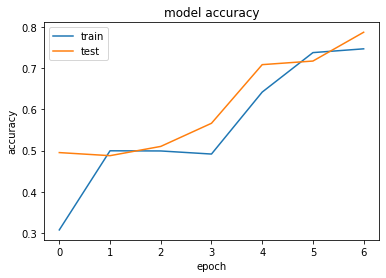

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


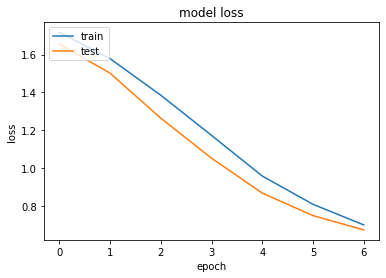

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()